# Analyzing Factbook CIA data with SQL and Python

**Main goal is to combine SQL and Python in order to understand how to extract and analyze data from a db**

## Resources used

**Anaconda distribution** - *Jupyter Notebook v 5.7.8*, *Python 3.7.3*

**CIA World Factbook Database** -*https://www.cia.gov/library/publications/download* - the Dataquest platform supplied a small part of the entire DB for the purpose of this exercise



In [1]:
# First, connecting to the database using sqlite3

import pandas as pd
import sqlite3

conn = sqlite3.connect("factbook.db")

#reading the tables inside the database

pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table'", conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [9]:
# examining the first records of the DB, to give a general overview of the data

pd.read_sql_query("select * from facts limit 5",conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
#examining some data and looking out for outliers inside our DB

query = "select min(population) min_population, max(population) max_population, min(population_growth) min_population_growth, max(population_growth) max_population_growth from facts"

pd.read_sql_query(query, conn)

,min_population,max_population,min_population_growth,max_population_growth
0,0,7256490011,0.0,4.02


 As we can see, at least one country has a population of 0, which cannot be right. We have to look in detail and fix the data.

In [5]:
# selecting countries with population 0

query = "select name from facts where population = 0"
pd.read_sql_query(query, conn)


,name
0,Antarctica


Antarctica isn't really a country - this could be removed or not taken into consideration when using population data **to do**

Next, we will look on the maximum population, as it is (a little) over what one would expect. Some cleaning might be involved there too.

In [6]:
# selecting country with max poopulation

query = "select name from facts where population = 7256490011"
pd.read_sql_query(query,conn)

,name
0,World


The "world" row would be another SQL entry that needs to be removed 

We can now create a histograms for stats of countries around the world, excluding the two outliers we found.



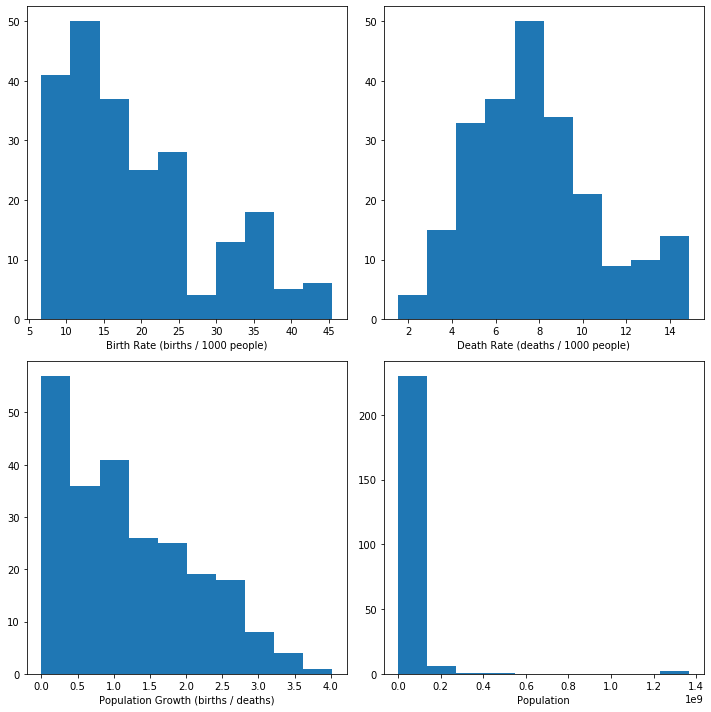

In [11]:
# writing a query to select the stats we want and exclude the outliers

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

query = "select population, population_growth,birth_rate,death_rate from facts where name not in ('Antarctica','World')"

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

clean_data = pd.read_sql_query(query, conn)

clean_data["birth_rate"].hist(ax=ax1, grid = False)
ax1.set_xlabel("Birth Rate (births / 1000 people)")
clean_data["death_rate"].hist(ax=ax2, grid = False)
ax2.set_xlabel("Death Rate (deaths / 1000 people)")
clean_data["population_growth"].hist(ax=ax3, grid = False)
ax3.set_xlabel("Population Growth (births / deaths)")
clean_data["population"].hist(ax=ax4, grid = False)
ax4.set_xlabel("Population")
plt.tight_layout()
plt.show()


**Observations:** The *Birth rate* and *Population Growth* show a right skewed distribution, while the *Death Rate* shows a somehow normal distribution. The *Population* graph is hard to read because of the outliers.

Next, we will locate the region ( country / city state ) with the highest population density.

In [44]:
#creating the query and selecting the top 5
query = "select  name, CAST(population as float)/CAST(area as float) 'Population density' from facts where name not in ('Antarctica','World') order by 2 desc"
pd.read_sql_query(query,conn).head()


,name,Population density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CD17F9470>]],
      dtype=object)

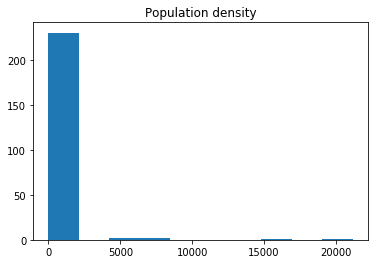

In [45]:
#plotting the histogram of densities
pd.read_sql_query(query,conn).hist(grid = False, )

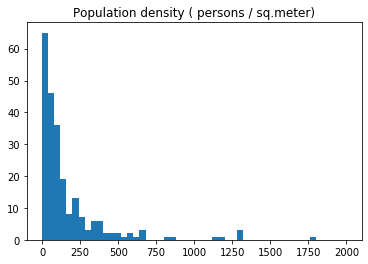

In [49]:
#making the graph more readable by limiting the range and 

plt.hist(pd.read_sql_query(query,conn)["Population density"],bins = 50, range=(0,2000))
plt.title("Population density ( persons / sq.meter)")
plt.show()

Seems that some places are highly populated, but because the data includes countries as well as city states, the graphs and results can be misleading.

#### Future work:

Some graph improvement can be done using *Seaborn* or another libray.
More explanations on the data we analyzed can be introduced at the start (measure units, sources, etc.)

Future cleaning of the data is needed in order to get accurate results on our *population density* query.

The database is extremely useful and complex, the full version would definitely help us understand not only some current trends, but future ones as well. Correlations can be made between economic, social and political markers in order to better understand our world.


